# RandomForestRegressor with the Blue Book for Bulldozers

We will be looking at the Blue Book for Bulldozers Kaggle Competition: "The goal of the contest is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuration. The data is sourced from auction result postings and includes information on usage and equipment configurations."
This is a very common type of dataset and prediciton problem, and similar to what you may see in your project or workplace.

https://www.kaggle.com/c/bluebook-for-bulldozers

Using a Random Forest Regressor from the sklearn library and the fastai library, we will predict the price.

#### Initialisation

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

/Users/mortenjensen/opt/anaconda3/envs/fastai-cpu/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


### The data

Set the path to the folder containing the data set

In [3]:
Mac = "yes"

In [9]:
pwd

'/Users/mortenjensen/ML/courses/ml1'

In [7]:
if Mac == "yes":
    PATH = "/Users/mortenjensen/ML/data/bulldozer/"
else:
    PATH = "/home/ubuntu/fastai/data/bulldozer/"
    

Using pandas the .csv file is read to a dataframe. Columns containing dates should be included in "parse_dates="

In [8]:
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, 
                     parse_dates=["saledate"])

FileNotFoundError: [Errno 2] File /Users/mortenjensen/ML/data/bulldozer/Train.csv does not exist: '/Users/mortenjensen/ML/data/bulldozer/Train.csv'

The bull book data set contains 401125 rows of observations and 53-1 features.

In [11]:
df_raw.shape

(401125, 53)

To inspect the dateframe, we define a function to display a maximum of 1000 elements in each direction:

In [13]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

#### Display the dataframe

In [28]:
display_all(df_raw.head())

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
display_all(df_raw.describe(include='all'))

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,380989.000000,401125.000000,1.427650e+05,69639,401125,401125,401125,263934,56908,71919,190350,401125,401125,401125,401125,104361,400800,192077,79134,148606,79134,183230,79134,25219,25219,25219,25219,320570,25219,104137,25230,25219,94718,213952,43458,43362,43362,99153,99872,99218,99288,99218,99153,78672,79833,79834,69411,69369
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3919,4999,1950,175,122,139,6,74,53,6,6,4,6,2,4,3,2,8,2,2,6,3,2,12,2,4,2,3,17,3,2,2,3,2,19,29,3,3,3,2,10,7,4,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium,2009-02-16 00:00:00,310G,580,C,II,L,Medium,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Florida,TEX,Track Excavators,Two Wheel Drive,OROPS,None or Unspecified,None or Unspecified,No,Standard,Standard,None or Unspecified,None or Unspecified,14',None or Unspecified,No,2 Valve,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Standard,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33985,1932,5039,19798,43235,13202,15875,62274,56166,63944,101167,101167,46139,173932,178300,70614,77685,48829,140328,75211,24692,9615,21923,23937,141404,19463,83452,12719,16207,46339,184582,40430,40515,42784,84880,79651,78820,83093,90255,84653,78652,38612,69923,68073,68679
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989-01-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.556040,1899.156901,3.457955e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.976779,291.797469,2.759026e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df_raw.dtypes

SalesID                              int64
SalePrice                            int64
MachineID                            int64
ModelID                              int64
datasource                           int64
auctioneerID                       float64
YearMade                             int64
MachineHoursCurrentMeter           float64
UsageBand                           object
saledate                    datetime64[ns]
fiModelDesc                         object
fiBaseModel                         object
fiSecondaryDesc                     object
fiModelSeries                       object
fiModelDescriptor                   object
ProductSize                         object
fiProductClassDesc                  object
state                               object
ProductGroup                        object
ProductGroupDesc                    object
Drive_System                        object
Enclosure                           object
Forks                               object
Pad_Type   

### Data Processing

The blue book Bulldozer competition specify the predictions should be evaluated by RMSLE (root mean squared log error) between the actual and predicted auction prices. Therefore we take the log of the prices, so that RMSE (root mean squared error) will give us what we need. You could do this step later as well.

In [31]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

##### Date column

Regarding the saledate, you should always consider a feature extraction step. Without expanding your date-time into these additional fields, you can't capture any trend/cyclical behavior as a function of time at any of these granularities. Thease trend/cyclical behavior could be week number, quater, holidays and so on. 

The following method extracts particular date fields from a complete datetime for the purpose of constructing categoricals. 

In [35]:
add_datepart(df_raw, 'saledate')
display_all(df_raw.head())

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2006,11,46,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,2004,3,13,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2004,2,9,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011,5,20,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,7,30,23,3,204,False,False,False,False,False,False,1248307200


Notice that the SaleDate column have been expanded into 12 new featues [saleYear, saleMonth,...sales_year_start] 

However, the add_datepart command from fastai, won't give you information on trend/cyclical behavior such as superbowl, sunny day, rain day and so on you have to know your domain for this!. 

##### Input to the randomforestregressor -  =! Strings

Before running the RandomForestRegressor we need to transform some of our features. The reason:

The RandomForestRegressor code is written as: 

`m = RandomForestRegressor(n_jobs=-1)`

`m.fit(features), target)`

The first line sets the parameters controlling the RandomForestRegressor, here `n_jobs=-1` means using all processors for parallelized computing. Another parameter could be n_estimators, which specify the number of trees in the forest.

The second line builds the forest of trees from the training set and features fit(Features, Target). The training input samples. Internally, its dtype will be converted to `dtype=np.float3`
. Therefore, it is important to transform stings in the dateframe to categories, which can be converted to np.float32, in contrast to strings. 

The categorical variables are currently stored as strings, which is inefficient, and doesn't provide the numeric coding required for a random forest. Therefore we call `train_cats` from Fastai to convert strings to pandas categories.

In [36]:
train_cats(df_raw)

Show colums changed to category

In [56]:
display_all(df_raw.dtypes)

SalesID                        int64
SalePrice                    float64
MachineID                      int64
ModelID                        int64
datasource                     int64
auctioneerID                 float64
YearMade                       int64
MachineHoursCurrentMeter     float64
UsageBand                   category
fiModelDesc                 category
fiBaseModel                 category
fiSecondaryDesc             category
fiModelSeries               category
fiModelDescriptor           category
ProductSize                 category
fiProductClassDesc          category
state                       category
ProductGroup                category
ProductGroupDesc            category
Drive_System                category
Enclosure                   category
Forks                       category
Pad_Type                    category
Ride_Control                category
Stick                       category
Transmission                category
Turbocharged                category
B

Focusing on the column with UsageBand, we can see that it contains three categories:

In [47]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

Optionally one can change the order of the categories, however it it not neassary for the randomforestregressor algorithm.

In [51]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)
df_raw.UsageBand.cat.categories

Index(['High', 'Medium', 'Low'], dtype='object')

Normally, pandas will continue displaying the text categories, while treating them as numerical data internally. Optionally, we can replace the text categories with numbers, which will make this variable non-categorical, like so:.

In [ ]:
df_raw.Hydraulics = df_raw.Hydraulics.cat.codes
df_raw.Hydraulics.head()

##### Missing values 

We're still not quite done - for instance we have lots of missing values, which we can't pass directly to a random forest. 

We can show the procentage of missing values in each column by:

In [59]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.000000
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

To handle the missing values the `proc_df` code from fastai is used. The `proc_df` not only handles missing values, it also replace categories with their numeric codes and split the dependent variable into a separate variable (split features and target values).

For each column of the dataframe which is not in skip_flds nor in ignore_flds, NaN values are replaced by the median value of the column. 

skip_flds: A list of fields that dropped from df.
ignore_flds: A list of fields that are ignored during processing.

###### Save point for df_raw before running Proc_df

In [7]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')

NameError: name 'df_raw' is not defined

In [8]:
df_raw = pd.read_feather('tmp/bulldozers-raw')

##### Run proc_df continued from before save point. 

In [9]:
df, y, nas = proc_df(df_raw, 'SalePrice')

## RandomForestRegressor

Now we have a dataframe with features and target values ready for the RandomForestRegressor

##### Validation set

Just because a learning algorithm fits a training set well, that does not mean it is a good hypothesis. It could over fit and as a result your predictions on the test set would be poor. 


![Image of fittings](https://i.stack.imgur.com/t0zit.png)

The error of your hypothesis as measured on the data set with which you trained the parameters will be lower than the error on any other data set.

Given many models with different polynomial degrees, we can use a systematic approach to identify the 'best' function. In order to choose the model of your hypothesis, you can test each degree of polynomial and look at the error result.

One way to break down our dataset into the three sets is:

Training set: 60%
Cross validation set: 20%
Test set: 20%
We can now calculate three separate error values for the three different sets using the following method:

1. Optimize the parameters in Θ using the training set for each polynomial degree.
2. Find the polynomial degree d with the least error using the cross validation set.
3. Estimate the generalization error using the test set


Kaggle's Blue book bulldozers competition already supply us with a vaildation and test set. However, for practice we will spilt the dataframe into a training and validation set. 

In [10]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((389125, 66), (389125,), (12000, 66), (12000,))

`Notice` that since we are dealing a data set that has a time/date column, we use the latest oberservations to our validation set. 

Use your domain knowledge to chooses the right subset for validation and testing. It might be a random subset!

Next we define a function to first calcualte the roor mean squard error:

In [18]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

Define function to display results of training and validation errors.  

In [ ]:
def print_score(m):
    res = ['Train RMSLE ={:05f}'.format(rmse(m.predict(X_train), y_train)), 'Vaild RMSLE={:05f}'.format(rmse(m.predict(X_valid), y_valid)),
            'Train R squared = {:05f}'.format(m.score(X_train, y_train)), 'Vaild R squared = {:05f}'.format(m.score(X_valid, y_valid))]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

### Speeding things up!

#### 1. method - Subset

First we use proc_df to divide our dataframe in features and target values. Furthermore we add the subset parameter which choose a random subset of size from df.

In [14]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=40000, na_dict=nas)
X_train, _ = split_vals(df_trn, 30000)
y_train, _ = split_vals(y_trn, 30000)

In [15]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 58.3 s, sys: 126 ms, total: 58.4 s
Wall time: 14.9 s
['Train RMSE =0.091423', 'Vaild RMSE=0.318391', 'Train R squared = 0.982273', 'Vaild R squared = 0.818962']


#### 2. method - Subsampling

It turns out that one of the easiest ways to avoid over-fitting is also one of the best ways to speed up analysis: subsampling. Let's return to using our full dataset, so that we can demonstrate the impact of this technique.

In [19]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

The basic idea is this: rather than limit the total amount of data that our model can access, let's instead limit it to a different random subset per tree. That way, given enough trees, the model can still see all the data, but for each individual tree it'll be just as fast as if we had cut down our dataset as before.

In [21]:
set_rf_samples(10000)

In [28]:
m = RandomForestRegressor(n_estimators=50, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 7min 32s, sys: 1.56 s, total: 7min 34s
Wall time: 2min 1s
['Train RMSE =0.077622', 'Vaild RMSE=0.235115', 'Train R squared = 0.987408', 'Vaild R squared = 0.901279', 0.9098610305639883]


Since each additional tree allows the model to see more data, this approach can make additional trees more useful. Therefore we use the n_estimators parameter to calculate on 100 trees(below). 

Moreover we add the parameter `oob_score=true`. The oob_score calculates the error on the training set, by only include the trees in the calculation of a row's error where that row was *not* included in training that tree. This allows us to see whether the model is over-fitting, without needing a separate validation set.

This also has the benefit of allowing us to see whether our model generalizes, even if we only have a small amount of data so want to avoid separating some out to create a validation set.

This is as simple as adding one more parameter to our model constructor. We print the OOB error last in our `print_score` function below.

In [29]:
m = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 15min 14s, sys: 2.98 s, total: 15min 17s
Wall time: 3min 58s
['Train RMSE =0.075685', 'Vaild RMSE=0.234068', 'Train R squared = 0.988028', 'Vaild R squared = 0.902156', 0.9129978390971263]


In [30]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([8.9872 , 9.39266, 9.9988 , 9.10498, 9.39266, 9.39266, 9.39266, 9.21034, 8.9872 , 9.10498, 9.10498,
        9.21034, 9.15905, 9.15905, 9.43348, 9.3501 , 9.39266, 9.10498, 9.21034, 9.10498, 9.25913, 8.96188,
        9.21034, 9.10498, 9.21034, 9.43348, 9.10498, 9.10498, 9.30565, 9.21034, 9.10498, 9.39266, 9.04782,
        9.08251, 9.61581, 9.04782, 9.04782, 8.9872 , 9.10498, 9.21034, 9.21034, 8.9872 , 8.9872 , 9.21034,
        8.9872 , 9.10498, 9.10498, 8.9359 , 9.13238, 9.30565, 9.15905, 9.10498, 9.10498, 9.16952, 9.21034,
        9.30565, 9.21034, 9.13238, 9.43348, 9.04782, 9.13238, 9.5819 , 9.21034, 8.9872 , 9.10498, 8.95545,
        9.10498, 9.21034, 9.21034, 9.21034, 9.21034, 9.10498, 9.39266, 9.04782, 9.13238, 9.30565, 9.10498,
        9.03002, 8.9872 , 9.21034, 9.10498, 8.9872 , 9.10498, 8.9872 , 8.9872 , 8.9872 , 9.21034, 9.21034,
        8.9872 , 9.10498, 9.21034, 9.15905, 8.9872 , 9.21034, 8.9872 , 9.04782, 9.21034, 8.95545, 9.21034,
        8.9872 ]),
 9.16458335405109,

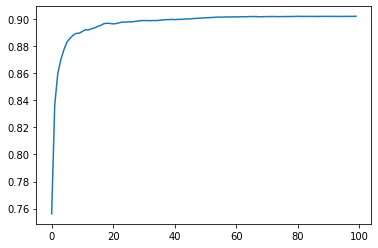

In [31]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(100)]);

### Tree building parameters

In [32]:
reset_rf_samples()

In [33]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [34]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 6min 6s, sys: 1.4 s, total: 6min 8s
Wall time: 1min 36s
['Train RMSE =0.078523', 'Vaild RMSE=0.237495', 'Train R squared = 0.987114', 'Vaild R squared = 0.899271', 0.9082533138145348]


In [35]:
t=m.estimators_[0].tree_

In [36]:
dectree_max_depth(t)

48

In [37]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

['Train RMSE =0.140606', 'Vaild RMSE=0.233352', 'Train R squared = 0.958682', 'Vaild R squared = 0.902754', 0.9072908660972632]


In [38]:
t=m.estimators_[0].tree_

In [39]:
dectree_max_depth(t)

37

Another way to reduce over-fitting is to grow our trees less deeply. We do this by specifying (with min_samples_leaf) that we require some minimum number of rows in every leaf node. This has two benefits:

There are less decision rules for each leaf node; simpler models should generalize better
The predictions are made by averaging more rows in the leaf node, resulting in less volatility

In [40]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

['Train RMSE =0.114984', 'Vaild RMSE=0.233473', 'Train R squared = 0.972368', 'Vaild R squared = 0.902653', 0.9085356908646045]


We can also increase the amount of variation amongst the trees by not only use a sample of rows for each tree, but to also using a sample of columns for each split. We do this by specifying max_features, which is the proportion of features to randomly select from at each split.

The number of features to consider when looking for the best split:

- If int, then consider max_features features at each split.

- If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.

- If “auto”, then max_features=n_features.

- If “sqrt”, then max_features=sqrt(n_features).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

In [44]:
m = RandomForestRegressor(n_estimators=160, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 11min 2s, sys: 2.44 s, total: 11min 4s
Wall time: 2min 57s
['Train RMSE =0.117082', 'Vaild RMSE=0.225714', 'Train R squared = 0.971351', 'Vaild R squared = 0.909016', 0.9161523519949268]


In [ ]:
m = RandomForestRegressor(n_estimators=160, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True, warm_start=True)
%time m.fit(X_train, y_train)
print_score(m)